In [71]:
%pip install numpy opencv-python mediapipe

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import mediapipe as mp
import cv2

In [11]:
mph=mp.solutions.holistic
mpd=mp.solutions.drawing_utils

In [12]:
def dl(image,results):
    mpd.draw_landmarks(image,results.face_landmarks,mph.FACEMESH_TESSELATION,mpd.DrawingSpec(color=(34,234,5),thickness=1,circle_radius=1), mpd.DrawingSpec(color=(34,123,90),thickness=1,circle_radius=1))
    mpd.draw_landmarks(image,results.pose_landmarks,mph.POSE_CONNECTIONS, mpd.DrawingSpec(color=(23,5,100),thickness=2,circle_radius=3), mpd.DrawingSpec(color=(123,80,67),thickness=2,circle_radius=2))
    mpd.draw_landmarks(image,results.left_hand_landmarks,mph.HAND_CONNECTIONS,mpd.DrawingSpec(color=(90,78,56),thickness=2,circle_radius=4), mpd.DrawingSpec(color=(34,123,90),thickness=2,circle_radius=2))
    mpd.draw_landmarks(image,results.right_hand_landmarks,mph.HAND_CONNECTIONS, mpd.DrawingSpec(color=(67,34,90),thickness=2,circle_radius=4), mpd.DrawingSpec(color=(23,4,56),thickness=2,circle_radius=2))


In [13]:
def detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [14]:
mpd.draw_landmarks??

Signature:
mpd.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Optional[
        Union[DrawingSpec, Mapping[int, DrawingSpec]]
    ] = DrawingSpec(color=RED_COLOR),

In [16]:
%pip install matplotlib

In [17]:
from matplotlib import pyplot

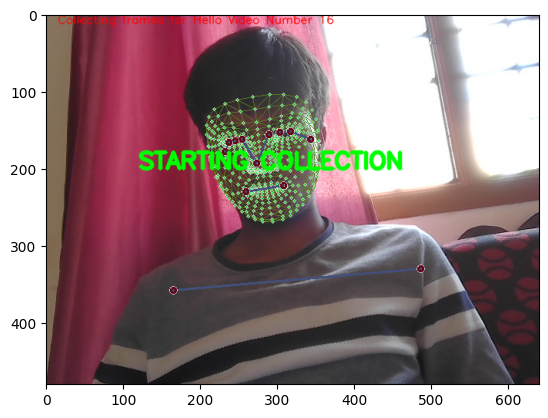

In [35]:
pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [36]:
def arr(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose,face,left_hand,right_hand])

In [37]:

import os 

In [38]:
words = [
    "Hello",
    "I/me",
    "Yes",
    "No",
    "Please",
    "Thank you",
    "Want",
    "What?",
    "Home",
    "Eat/food",
    "More",
    "Bathroom",
    "Fine",
    "Like",
    "Finish",
    "I'm fine",
    "Nice to meet you",
    "How are you",
    "Go to",
    "Love",
    "Help",
    "School",
    "Understand",
    "Where?",
    "Who?",
    "How?",
    "When?",
    "Goodbye",
    "Friend"
]

In [39]:
PATH_DIRECTORY = os.path.join('Dataset')
signs = np.array(words) 
total_number_of_sequences = 40
frame_length = 30
for sign in signs:
    for sequence in range(total_number_of_sequences):
        try:
            os.makedirs(os.path.join(PATH_DIRECTORY,sign,str(sequence)))
        except:
            pass

In [ ]:
capture = cv2.VideoCapture(0)
with mph.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as model:
    for sign in signs:
        for sequence in range(total_number_of_sequences):
            for fnum in range(frame_length):
                ret, frame = capture.read()
                image,results=detection(frame,model)
                dl(image,results)

                if fnum == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(sign, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('Sign Language Recognition', image)
                    cv2.waitKey(5000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(sign, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('Sign Language Recognition', image)


                keypoints = arr(results)
                npy_file = os.path.join(PATH_DIRECTORY, sign, str(sequence), str(fnum))
                np.save(npy_file, keypoints)

                #cv2.imshow('Sign Language Recognition',image)
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    capture.release()
    cv2.destroyAllWindows()